<a href="https://colab.research.google.com/github/faithmosifo/Coursea_Capstone/blob/master/Whimsical_Whirlwind_Tour_of_the_Riverwalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Whimsical Whirlwind Tour of the Riverwalk: No Car, No Cry!

The siren song of the San Antonio Riverwalk! Our grand adventure begins not with the roar of an engine or the ping of a ride-share app, but with the gentle sway of a tour boat gliding along the emerald ribbon of the river. For a mere pittance (under $20, mind you!), we shall traverse this watery wonderland, our eyes feasting on the vibrant tapestry of Texan culture and picturesque scenery. Our mission, should we choose to accept it (and we absolutely do!), is to pinpoint the ten most trodden paths. The venues that whisper tales of countless happy travelers. This knowledge, like a trusty compass, will guide our footsteps, allowing us to dedicate our precious vacation funds to the truly important things: Stetsons, spicy pecans, and perhaps a serenading mariachi band!
Our journey into the digital depths to unearth these popular haunts follows a meticulous, almost Sherlockian, approach: The Exploratory Data Analysis Caper!


# Scene 1: Pinpointing Paradise - The Hotel's Humble Abode

Our adventure commences at the Riverwalk Plaza, our temporary haven amidst the bustling heart of San Antonio. Like a seasoned cartographer marking their starting point, our code first diligently seeks out the precise longitude and latitude of this esteemed establishment. This is our "X marks the spot," our anchor in the sea of potential adventures. Knowing our hotel's coordinates is paramount. it's the digital equivalent of knowing which dock to return to after a day of exploration!

In [ ]:
import requests
import pandas as pd
import numpy as np
import random
import matplotlib.pylab as plt
pd.json_normalize
from urllib.request import urlopen
import ssl
import csv
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Done')

Done


In [ ]:
!pip install geopy
from geopy.geocoders import Nominatim
print('Done')

Done


In [ ]:
# @title cred
CLIENT_ID = 'IGVRM5QNZGQJZTQP2A4ULLYSLVYYA4RK4RAAYXUKOL4V2RTD' # your Foursquare ID
CLIENT_SECRET = '0G1KPSXGK51KCSSGKEGTZ4GCXMWKKYT4VVMQNNTEUFY11STB' # your Foursquare Secret
VERSION = '20170604'
LIMIT = 100
radius = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IGVRM5QNZGQJZTQP2A4ULLYSLVYYA4RK4RAAYXUKOL4V2RTD
CLIENT_SECRET:0G1KPSXGK51KCSSGKEGTZ4GCXMWKKYT4VVMQNNTEUFY11STB


### Methodology: The exploratory data analysis.

Code Snippet Analogy: Imagine our code as a tiny, well-trained drone, buzzing around the digital landscape until it locks onto the unique signal emanating from the Riverwalk Plaza. Its specific GPS coordinates.

In [ ]:
!pip install geopy
from geopy.geocoders import Nominatim

In [ ]:
address = '100 Villita St, San Antonio, TX 78205'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


29.423033 -98.493219


## Scene 2: Whispers on the Digital Breeze - Exploring the Neighborhood

In [ ]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
print('Done')

Done


In [ ]:
import requests
from urllib.parse import urlencode

In [ ]:
results = requests.get(url).json()

In [ ]:
items = results['response']['groups'][0]['items']

### With our starting point firmly established, our digital eyes now scan the vicinity. Eager tourists stepping out of their hotel and peering around, our code diligently explores the venues around our newfound location. This digital reconnaissance allows for pinpoint accuracy, ensuring we're not chasing phantom attractions in distant corners of the city. Only the treasures within a reasonable, walkable distance a short boat ride away, will pique our interest.
#### Code Snippet Analogy: Picture our code casting a digital net, gently sifting through the online world to capture the names and locations of all the exciting places nestled near our Riverwalk Plaza haven.


In [ ]:
import pandas as pd
from pandas import json_normalize

## Scene 3: Assembling the Scroll of Possibilities - Building the Dataframe

In [ ]:
df = json_normalize(items)
df.head(2)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,photo.createdAt,photo.prefix,photo.suffix,photo.width,photo.height,photo.visibility,venue.location.crossStreet,venue.venuePage.id,venue.location.neighborhood,venue.deliveryProviders
0,e-0-4ad4bffef964a520f3ea20e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4ad4bffef964a520f3ea20e3,San Fernando Cathedral,115 W Main Plz,29.424318,-98.494036,"[{'label': 'entrance', 'lat': 29.424198, 'lng'...",163,...,1417922362,https://fastly.4sqi.net/img/general/,/4333460_7JN24bBNH4ZY1iAGmbghmv3y0ajJrBcPmq3zJ...,1440,1920,public,NaN,NaN,NaN,NaN
1,e-0-4ad4bffdf964a52089ea20e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4ad4bffdf964a52089ea20e3,Drury Plaza Hotel San Antonio Riverwalk,105 S St. Mary's St,29.424357,-98.491746,"[{'label': 'display', 'lat': 29.42435671565817...",205,...,1712467730,https://fastly.4sqi.net/img/general/,/56195279_9iZV-3X322fago8uJyO-htnoYRBe-0Gt6Hts...,1080,1920,public,NaN,NaN,NaN,NaN


### The digital net has yielded a bounty of information! Now, like diligent scribes organizing their findings, our code begins to piece things together by building a 2-dimensional labeled data structure with columns of potentially different types. Think of it as a magical scroll, not of parchment and ink, but of neatly organized rows and columns. This "dataframe," as it's known in the land of coding, resembles a sophisticated spreadsheet, ready to hold the names of venues, their addresses, and their all-important geographical coordinates.
Code Snippet Analogy: Imagine our code carefully transcribing each captured venue onto our digital scroll, creating columns for its name, where it resides (address), and its exact position in the world (latitude and longitude).


##Scene 4: Polishing the Gems - The Art of Data Cleaning

In [ ]:
df.rename(columns={'venue.name': 'venue', 'venue.location.lat':'lat', 'venue.location.lng':'lng', 'venue.location.distance':'distance', 'venue.location.formattedAddress':'address', 'venue.location.city':'city', 'venue.location.state':'state', 'venue.location.postalCode':'postcode',}, inplace=True)
df.head(2)

,referralId,reasons.count,reasons.items,venue.id,venue,venue.location.address,lat,lng,venue.location.labeledLatLngs,distance,...,photo.createdAt,photo.prefix,photo.suffix,photo.width,photo.height,photo.visibility,venue.location.crossStreet,venue.venuePage.id,venue.location.neighborhood,venue.deliveryProviders
0,e-0-4ad4bffef964a520f3ea20e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4ad4bffef964a520f3ea20e3,San Fernando Cathedral,115 W Main Plz,29.424318,-98.494036,"[{'label': 'entrance', 'lat': 29.424198, 'lng'...",163,...,1417922362,https://fastly.4sqi.net/img/general/,/4333460_7JN24bBNH4ZY1iAGmbghmv3y0ajJrBcPmq3zJ...,1440,1920,public,NaN,NaN,NaN,NaN
1,e-0-4ad4bffdf964a52089ea20e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4ad4bffdf964a52089ea20e3,Drury Plaza Hotel San Antonio Riverwalk,105 S St. Mary's St,29.424357,-98.491746,"[{'label': 'display', 'lat': 29.42435671565817...",205,...,1712467730,https://fastly.4sqi.net/img/general/,/56195279_9iZV-3X322fago8uJyO-htnoYRBe-0Gt6Hts...,1080,1920,public,NaN,NaN,NaN,NaN


#### Our initial scroll, while informative, might contain a few smudges or irrelevant details, perhaps a listing for a hotel or two. The next crucial step is to clean the data. This isn't about scrubbing physical grime, but about refining our digital information, improving its quality and making it easier to work with. We might remove duplicate entries, standardize address formats, or handle missing information with the grace of a seasoned butler tidying a drawing room.

In [ ]:
df2['venue'] = df2['venue'].str.strip()
df2_filtered = df2[~df2['venue'].str.contains('|'.join(keywords_to_exclude), case=False)]
df2_filtered.head()

,venue,venue.location.address,lat,lng,distance,postcode,address,venue.categories
0,San Fernando Cathedral,115 W Main Plz,29.424318,-98.494036,163,78205,"[115 W Main Plz, San Antonio, TX 78205, United...","[{'id': '4bf58dd8d48988d132941735', 'name': 'C..."
2,Biga on the Banks,203 S Saint Marys St,29.423520,-98.492137,118,78205,"[203 S Saint Marys St (at Market St), San Anto...","[{'id': '4bf58dd8d48988d14e941735', 'name': 'A..."
3,The Westin Riverwalk,420 W Market St,29.423402,-98.490771,240,78205,"[420 W Market St (at Navarro St), San Antonio,...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."
4,The Esquire Tavern,155 E Commerce St,29.424834,-98.491761,245,78205,"[155 E Commerce St (at St. Marys), San Antonio...","[{'id': '4bf58dd8d48988d11e941735', 'name': 'C..."
5,Domingo,123 N Saint Marys St,29.424935,-98.491622,262,78205,"[123 N Saint Marys St (River Walk), San Antoni...","[{'id': '4bf58dd8d48988d116941735', 'name': 'B..."


In [ ]:
df2 = df.drop(columns=['reasons.count', 'venue.location.neighborhood', 'venue.location.labeledLatLngs', 'venue.location.crossStreet', 'state', 'city', 'photo.id', 'venue.hereNow.groups', 'venue.stats.usersCount', 'venue.stats.usersCount', 'venue.stats.checkinsCount', 'venue.stats.usersCount', 'venue.stats.tipCount', 'venue.location.cc', 'venue.verified','venue.location.country', 'photo.createdAt', 'photo.prefix', 'photo.suffix', 'reasons.items', 'photo.width', 'photo.height', 'photo.visibility', 'venue.deliveryProviders', 'venue.venuePage.id', 'venue.stats.visitsCount', 'venue.beenHere.marked', 'venue.beenHere.lastCheckinExpiredAt', 'venue.beenHere.count', 'venue.hereNow.count', 'venue.hereNow.summary', 'venue.beenHere.unconfirmedCount', 'venue.createdAt', 'venue.photos.groups', 'venue.photos.count','venue.beenHere.marked', 'venue.beenHere.count',  'venue.id', 'referralId'], axis=1)
df2.head(15)

,venue,venue.location.address,lat,lng,distance,postcode,address,venue.categories
0,San Fernando Cathedral,115 W Main Plz,29.424318,-98.494036,163,78205,"[115 W Main Plz, San Antonio, TX 78205, United...","[{'id': '4bf58dd8d48988d132941735', 'name': 'C..."
1,Drury Plaza Hotel San Antonio Riverwalk,105 S St. Mary's St,29.424357,-98.491746,205,78205,"[105 S St. Mary's St, San Antonio, TX 78205, U...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."
2,Biga on the Banks,203 S Saint Marys St,29.423520,-98.492137,118,78205,"[203 S Saint Marys St (at Market St), San Anto...","[{'id': '4bf58dd8d48988d14e941735', 'name': 'A..."
3,The Westin Riverwalk,420 W Market St,29.423402,-98.490771,240,78205,"[420 W Market St (at Navarro St), San Antonio,...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."
4,The Esquire Tavern,155 E Commerce St,29.424834,-98.491761,245,78205,"[155 E Commerce St (at St. Marys), San Antonio...","[{'id': '4bf58dd8d48988d11e941735', 'name': 'C..."
5,Domingo,123 N Saint Marys St,29.424935,-98.491622,262,78205,"[123 N Saint Marys St (River Walk), San Antoni...","[{'id': '4bf58dd8d48988d116941735', 'name': 'B..."
6,Main Plaza Park,100 W Main Plz,29.424588,-98.493285,173,78205,[100 W Main Plz (btwn E Commerce St & W Market...,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P..."
7,Mokara Hotel & Spa,212 W Crockett St,29.424773,-98.490494,327,78205,"[212 W Crockett St, San Antonio, TX 78205, Uni...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."
8,Homewood Suites by Hilton,432 W Market St,29.423605,-98.491585,170,78205,"[432 W Market St (St. Marys), San Antonio, TX ...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."
9,Hotel Contessa,306 W Market St,29.423125,-98.489797,331,78205,"[306 W Market St (at Navarro), San Antonio, TX...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."


####Code Snippet Analogy: Picture our code as a meticulous editor, carefully reviewing our digital scroll, erasing any redundant entries or inconsistencies to ensure only the most relevant and accurate information remains.

In [ ]:
problematic_venues = df2[df2['venue'].str.contains('|'.join(keywords_to_exclude), case=False)]
print(problematic_venues['venue'].unique())

['Drury Plaza Hotel San Antonio Riverwalk' 'Mokara Hotel & Spa'
 'Homewood Suites by Hilton' 'Hotel Contessa'
 'Courtyard by Marriott San Antonio Riverwalk' 'Embassy Suites by Hilton'
 'Drury Inn & Suites San Antonio Riverwalk' 'Hotel Valencia Riverwalk'
 'Canopy by Hilton San Antonio Riverwalk' 'Hampton Inn & Suites'
 'Hilton Palacio del Rio'
 'Plaza San Antonio Hotel & Spa, Autograph Collection' 'Menger Hotel'
 'The Historic Crockett Hotel'
 'The St. Anthony, a Luxury Collection Hotel, San Antonio']


In [ ]:
keywords_to_exclude = ['hotel', 'suite', 'canopy', 'courtyard', 'drury','Marriott','Hilton']
df2_filtered = df2[~df2['venue'].str.contains('|'.join(keywords_to_exclude), case=False)]
df2_filtered.head()

,venue,venue.location.address,lat,lng,distance,postcode,address,venue.categories
0,San Fernando Cathedral,115 W Main Plz,29.424318,-98.494036,163,78205,"[115 W Main Plz, San Antonio, TX 78205, United...","[{'id': '4bf58dd8d48988d132941735', 'name': 'C..."
2,Biga on the Banks,203 S Saint Marys St,29.423520,-98.492137,118,78205,"[203 S Saint Marys St (at Market St), San Anto...","[{'id': '4bf58dd8d48988d14e941735', 'name': 'A..."
3,The Westin Riverwalk,420 W Market St,29.423402,-98.490771,240,78205,"[420 W Market St (at Navarro St), San Antonio,...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."
4,The Esquire Tavern,155 E Commerce St,29.424834,-98.491761,245,78205,"[155 E Commerce St (at St. Marys), San Antonio...","[{'id': '4bf58dd8d48988d11e941735', 'name': 'C..."
5,Domingo,123 N Saint Marys St,29.424935,-98.491622,262,78205,"[123 N Saint Marys St (River Walk), San Antoni...","[{'id': '4bf58dd8d48988d116941735', 'name': 'B..."


In [ ]:
df2.drop(df2[df2['venue'] == "Drury Plaza Hotel San Antonio Riverwalk"].index, inplace=True)
df2.drop(df2[df2['venue'] == "Courtyard by Marriott San Antonio Riverwalk"].index, inplace=True)
df2.drop(df2[df2['venue'] == "Homewood Suites by Hilton"].index, inplace=True)
df2.drop(df2[df2['venue'] == "Canopy by Hilton San Antonio Riverwalk"].index, inplace=True)
df2.drop(df2[df2['venue'] == "Hotel Contessa"].index, inplace=True)
df2.drop(df2[df2['venue'] == "Embassy Suites by Hilton"].index, inplace=True)
df2.drop(df2[df2['venue'] == "Hotel Valencia Riverwalk "].index, inplace=True)

In [ ]:
df3 = df2[~df2['venue'].str.contains('Hotel|Suite|Canopy|Courtyard', case=False, na=False)]
df3.head()

,venue,venue.location.address,lat,lng,distance,postcode,address,venue.categories
0,San Fernando Cathedral,115 W Main Plz,29.424318,-98.494036,163,78205,"[115 W Main Plz, San Antonio, TX 78205, United...","[{'id': '4bf58dd8d48988d132941735', 'name': 'C..."
2,Biga on the Banks,203 S Saint Marys St,29.423520,-98.492137,118,78205,"[203 S Saint Marys St (at Market St), San Anto...","[{'id': '4bf58dd8d48988d14e941735', 'name': 'A..."
3,The Westin Riverwalk,420 W Market St,29.423402,-98.490771,240,78205,"[420 W Market St (at Navarro St), San Antonio,...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."
4,The Esquire Tavern,155 E Commerce St,29.424834,-98.491761,245,78205,"[155 E Commerce St (at St. Marys), San Antonio...","[{'id': '4bf58dd8d48988d11e941735', 'name': 'C..."
5,Domingo,123 N Saint Marys St,29.424935,-98.491622,262,78205,"[123 N Saint Marys St (River Walk), San Antoni...","[{'id': '4bf58dd8d48988d116941735', 'name': 'B..."


##Scene 5: A Clearer Vista - The Cleaned Dataframe Emerges

Ah, the result of our digital spring cleaning! The dataframe is cleaner and easier to read. Like a freshly polished window, it now offers a clear vista of the attractions surrounding us. We can readily discern a list of addresses, latitudes, longitudes, and the name of the venues near our hotel. The path to adventure is becoming clearer!
####Code Snippet Analogy: Imagine our digital scroll now shimmering with clarity, each venue listed with its essential details, presented in an organized and easily understandable manner.


In [ ]:
import pandas as pd

def is_on_riverwalk(address):
    """Checks if a given address is likely on the San Antonio River Walk."""
    if isinstance(address, str):
        lower_address = address.lower()
        return (
            "river walk" in lower_address or
            "riverwalk" in lower_address or
            "e commerce st" in lower_address or
            "w commerce st" in lower_address or
            "n st mary's st" in lower_address or
            "s st mary's st" in lower_address or
            "e river walk" in lower_address or
            "w river walk" in lower_address or
            "n river walk" in lower_address or
            "s river walk" in lower_address or
            "paseo del rio" in lower_address
        )
    return False


on_riverwalk_mask = df3['address'].apply(is_on_riverwalk)

riverwalk_venues = df3[on_riverwalk_mask]

if 'venue' in riverwalk_venues.columns:
    print("Venues on or near the San Antonio River Walk:")
    for venue_name in riverwalk_venues['venue']:
        print(f"- {venue_name}")
else:
    print("The 'venue' column was not found in the DataFrame.")


df3 = df2[~df2['venue'].str.contains('hotel|suite', case=False, na=False)].copy()
df3.head()

Venues on or near the San Antonio River Walk:


,venue,venue.location.address,lat,lng,distance,postcode,address,venue.categories
0,San Fernando Cathedral,115 W Main Plz,29.424318,-98.494036,163,78205,"[115 W Main Plz, San Antonio, TX 78205, United...","[{'id': '4bf58dd8d48988d132941735', 'name': 'C..."
2,Biga on the Banks,203 S Saint Marys St,29.423520,-98.492137,118,78205,"[203 S Saint Marys St (at Market St), San Anto...","[{'id': '4bf58dd8d48988d14e941735', 'name': 'A..."
3,The Westin Riverwalk,420 W Market St,29.423402,-98.490771,240,78205,"[420 W Market St (at Navarro St), San Antonio,...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."
4,The Esquire Tavern,155 E Commerce St,29.424834,-98.491761,245,78205,"[155 E Commerce St (at St. Marys), San Antonio...","[{'id': '4bf58dd8d48988d11e941735', 'name': 'C..."
5,Domingo,123 N Saint Marys St,29.424935,-98.491622,262,78205,"[123 N Saint Marys St (River Walk), San Antoni...","[{'id': '4bf58dd8d48988d116941735', 'name': 'B..."


##Scene 6: Speaking the Machine's Language - The Encoding Enchantment

###Now, we delve into the mystical art of preprocessing, and a significant part of this is encoding. We are, in essence, translating our human-readable data, the names of venues, perhaps into the numerical language that our computer understands. It's like providing a phrasebook so our digital assistants can comprehend our requests.


In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print("Done")

/bin/bash: line 1: conda: command not found
Done


In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

In [ ]:
len(df3['venue'].unique())

86

####Code Snippet Analogy: Picture our code as a skilled linguist, converting the textual descriptions of venues into a secret numerical code that the computer can easily process and analyze.


In [ ]:
df_onehot = pd.get_dummies(df3[['venue']], prefix="", prefix_sep="")


df_onehot['postalcode'] = df3['postcode']
df_onehot['venue'] = df3['venue']


fixed_columns = list(df_onehot.columns[-4:]) + list(df_onehot.columns[:-4])
df_onehot = df_onehot[fixed_columns]

print(df_onehot.shape)
df_onehot.head()

(86, 88)


,Yanaguana Garden,Zinc Bistro & Wine Bar,postalcode,venue,1718 Steakhouse,Acenar Mexican Restaurant,Alamo City Ghost Tours,Alamo Plaza,Arneson River Theatre,Aztec Theatre,...,The Institute of Chili,The Plaza Club,The San Antonio River Walk,The Station Cafe,The Westin Riverwalk,Tobin Center for the Performing Arts,Torch of Friendship (Antorcha de Amistad),Voodoo Doughnut,Whataburger,Wyndham La Cascada
0,False,False,78205,San Fernando Cathedral,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,78205,Biga on the Banks,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,78205,The Westin Riverwalk,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,78205,The Esquire Tavern,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,78205,Domingo,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df3.sort_values(by='distance', ascending=True, inplace=True)
df3.head(15)

,venue,venue.location.address,lat,lng,distance,postcode,address,venue.categories
2,Biga on the Banks,203 S Saint Marys St,29.423520,-98.492137,118,78205,"[203 S Saint Marys St (at Market St), San Anto...","[{'id': '4bf58dd8d48988d14e941735', 'name': 'A..."
0,San Fernando Cathedral,115 W Main Plz,29.424318,-98.494036,163,78205,"[115 W Main Plz, San Antonio, TX 78205, United...","[{'id': '4bf58dd8d48988d132941735', 'name': 'C..."
6,Main Plaza Park,100 W Main Plz,29.424588,-98.493285,173,78205,[100 W Main Plz (btwn E Commerce St & W Market...,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P..."
23,Alamo City Ghost Tours,115 W Main Plz,29.424801,-98.493612,200,78205,"[115 W Main Plz, San Antonio, TX 78205, United...","[{'id': '56aa371be4b08b9a8d573520', 'name': 'T..."
29,Wyndham La Cascada,226 Dwyer Ave,29.421035,-98.493497,224,78204,"[226 Dwyer Ave, San Antonio, TX 78204, United ...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."
3,The Westin Riverwalk,420 W Market St,29.423402,-98.490771,240,78205,"[420 W Market St (at Navarro St), San Antonio,...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."
4,The Esquire Tavern,155 E Commerce St,29.424834,-98.491761,245,78205,"[155 E Commerce St (at St. Marys), San Antonio...","[{'id': '4bf58dd8d48988d11e941735', 'name': 'C..."
5,Domingo,123 N Saint Marys St,29.424935,-98.491622,262,78205,"[123 N Saint Marys St (River Walk), San Antoni...","[{'id': '4bf58dd8d48988d116941735', 'name': 'B..."
10,Aztec Theatre,104 N Saint Marys St,29.424750,-98.490945,291,78205,"[104 N Saint Marys St, San Antonio, TX 78205, ...","[{'id': '4bf58dd8d48988d137941735', 'name': 'T..."
37,"Iron Cactus Mexican Restaurant, Grill and Marg...",200 Riverwalk,29.424967,-98.490964,306,78205,"[200 Riverwalk, San Antonio, TX 78205, United ...","[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M..."


##Scene 7: Focusing the Lens - Narrowing Down the Top Contenders

##To avoid being overwhelmed by a plethora of possibilities, we now seek to narrow our findings. Our code will act like a discerning traveler, sorting the data and having it only return the top 10 venues near the hotel. These are the destinations most likely to be buzzing with fellow adventurers, the cream of the Riverwalk crop!

In [ ]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

columns = ['postalcode', 'venue']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

venues_sorted = pd.DataFrame(columns=columns)

df_onehot = pd.get_dummies(df3[['venue']], prefix="", prefix_sep="")


df_onehot['postalcode'] = df3['postcode']
df_onehot['venue'] = df3['venue']


fixed_columns = list(df_onehot.columns[-4:]) + list(df_onehot.columns[:-4])
df_onehot = df_onehot[fixed_columns]

print(df_onehot.shape)
df_onehot.head()
df3.head(2)

(86, 88)


,venue,venue.location.address,lat,lng,distance,postcode,address,venue.categories
2,Biga on the Banks,203 S Saint Marys St,29.423520,-98.492137,118,78205,"[203 S Saint Marys St (at Market St), San Anto...","[{'id': '4bf58dd8d48988d14e941735', 'name': 'A..."
0,San Fernando Cathedral,115 W Main Plz,29.424318,-98.494036,163,78205,"[115 W Main Plz, San Antonio, TX 78205, United...","[{'id': '4bf58dd8d48988d132941735', 'name': 'C..."


#### Code Snippet Analogy: Imagine our code as a diligent researcher, sifting through the sorted list of venues and presenting us with only the top ten, the most frequently visited gems in the vicinity.

In [ ]:
numeric_cols = df3.select_dtypes(include=np.number).columns.tolist()
clustering_cols = [col for col in ['lat', 'lng', 'venue'] if col in numeric_cols]

if not clustering_cols:
    print("No numeric columns available for clustering based on lat, lng, venue")
else:
    df_clustering = df3[clustering_cols].copy()

    print(df_clustering.info())

    print(df_clustering.head())

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 2 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     86 non-null     float64
 1   lng     86 non-null     float64
dtypes: float64(2)
memory usage: 2.0 KB
None
          lat        lng
2   29.423520 -98.492137
0   29.424318 -98.494036
6   29.424588 -98.493285
23  29.424801 -98.493612
29  29.421035 -98.493497


##Scene 8: Unveiling Hidden Patterns - The K-Means Kaleidoscope

In [ ]:
df3['checkins'] = ...
df3['popularity'] = ...
df_clustering = df3[['lat', 'lng', 'checkins', 'popularity']]

###With our top contenders identified, we employ a clever technique to refine and cluster the venues using the k-means algorithm. This is like using a magical kaleidoscope to reveal hidden groupings within our data. This process helps us find groups of venues that share similarities, even if they weren't explicitly labeled as such. Perhaps several restaurants cluster together, or a group of historical sites emerges. This insight can confirm our assumptions about the area or reveal unexpected connections. Once these clusters are defined, any new venue we encounter could be easily assigned to its rightful group.

In [ ]:
kclusters = 2

numeric_cols = df3.select_dtypes(include=np.number).columns.tolist()
clustering_cols = [col for col in ['lat', 'lng', 'distance'] if col in numeric_cols]

if clustering_cols:
    df_clustering = df3[clustering_cols].copy()

    kmeans_model = KMeans(n_clusters=kclusters, random_state=0, n_init=10)

    kmeans_model.fit(df_clustering)

    df3['cluster_labels'] = kmeans_model.labels_


    clustered_df = df3.copy()

    print("Clustering complete.")
    print(clustered_df.head())

else:
    print("Cannot perform clustering as there are no suitable numeric columns.")


Clustering complete.
                     venue venue.location.address        lat        lng  \
2        Biga on the Banks   203 S Saint Marys St  29.423520 -98.492137   
0   San Fernando Cathedral         115 W Main Plz  29.424318 -98.494036   
6          Main Plaza Park         100 W Main Plz  29.424588 -98.493285   
23  Alamo City Ghost Tours         115 W Main Plz  29.424801 -98.493612   
29      Wyndham La Cascada          226 Dwyer Ave  29.421035 -98.493497   

    distance postcode                                            address  \
2        118    78205  [203 S Saint Marys St (at Market St), San Anto...   
0        163    78205  [115 W Main Plz, San Antonio, TX 78205, United...   
6        173    78205  [100 W Main Plz (btwn E Commerce St & W Market...   
23       200    78205  [115 W Main Plz, San Antonio, TX 78205, United...   
29       224    78204  [226 Dwyer Ave, San Antonio, TX 78204, United ...   

                                     venue.categories  checkins popular

####Code Snippet Analogy: Picture our code spinning the k-means kaleidoscope, the data points swirling and settling into distinct groups based on their characteristics, revealing the underlying structure of the Riverwalk's attractions.

In [ ]:
kclusters = 2

df_clustering = df3.drop(['venue'], axis=1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit

clustered_df = df2

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit

clustered_df


,venue,venue.location.address,lat,lng,distance,postcode,address,venue.categories
0,San Fernando Cathedral,115 W Main Plz,29.424318,-98.494036,163,78205,"[115 W Main Plz, San Antonio, TX 78205, United...","[{'id': '4bf58dd8d48988d132941735', 'name': 'C..."
2,Biga on the Banks,203 S Saint Marys St,29.423520,-98.492137,118,78205,"[203 S Saint Marys St (at Market St), San Anto...","[{'id': '4bf58dd8d48988d14e941735', 'name': 'A..."
3,The Westin Riverwalk,420 W Market St,29.423402,-98.490771,240,78205,"[420 W Market St (at Navarro St), San Antonio,...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."
4,The Esquire Tavern,155 E Commerce St,29.424834,-98.491761,245,78205,"[155 E Commerce St (at St. Marys), San Antonio...","[{'id': '4bf58dd8d48988d11e941735', 'name': 'C..."
5,Domingo,123 N Saint Marys St,29.424935,-98.491622,262,78205,"[123 N Saint Marys St (River Walk), San Antoni...","[{'id': '4bf58dd8d48988d116941735', 'name': 'B..."
...,...,...,...,...,...,...,...,...
95,Fogo de Chao Brazilian Steakhouse,849 E Commerce St,29.423994,-98.484619,840,78205,"[849 E Commerce St, San Antonio, TX 78205, Uni...","[{'id': '4bf58dd8d48988d16b941735', 'name': 'B..."
96,Long Barrack,300 Alamo Plz,29.425789,-98.486659,706,78205,"[300 Alamo Plz (at The Alamo), San Antonio, TX...","[{'id': '4deefb944765f83613cdba6e', 'name': 'H..."
97,Garcia Art Glass,NaN,29.416882,-98.488958,799,NaN,"[Texas, United States]","[{'id': '4bf58dd8d48988d1e2931735', 'name': 'A..."
98,"The St. Anthony, a Luxury Collection Hotel, Sa...",300 E Travis St,29.427355,-98.489181,620,78205,"[300 E Travis St (Navarro St.), San Antonio, T...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."


##Scene 9: Painting the Digital Canvas - The Grand Visualization

###Our final act is data visualization. We shall transform our digital scroll of information into a vibrant image, a graphic representation of data. This isn't just about pretty pictures; it's about communicating the relationships between the venues in a way that is immediately understandable to our human eyes. We achieve this by systematically mapping data values such as latitude and longitude,  to visual elements like the position of markers on a map.
####Code Snippet Analogy: Imagine our code as a talented artist, taking the raw numbers and text and painting a vivid picture that reveals the geographical layout of the top venues.

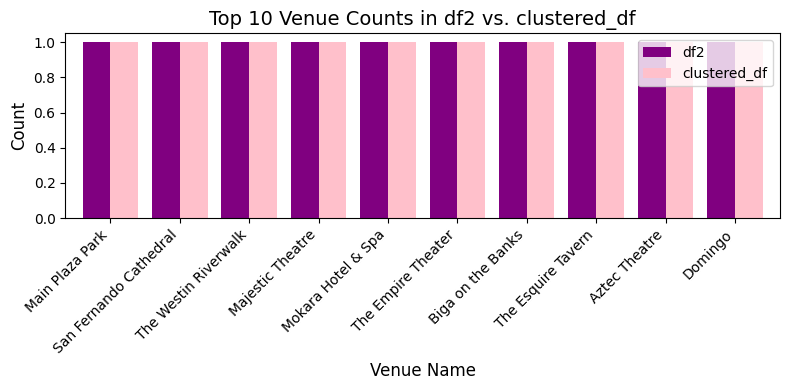

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

if 'venue' in df2.columns and 'venue' in clustered_df.columns:
    top_n = 10

    top_venues_df2 = df2['venue'].value_counts().head(top_n)

    top_venues_clustered_df = clustered_df['venue'].value_counts().head(top_n)

    all_top_venue_names = list(set(top_venues_df2.index) | set(top_venues_clustered_df.index))

    plot_data = pd.DataFrame(index=all_top_venue_names)
    plot_data['df2_count'] = top_venues_df2
    plot_data['clustered_df_count'] = top_venues_clustered_df

    plot_data.fillna(0, inplace=True)

    plot_data.sort_values(by='df2_count', ascending=False, inplace=True)

    ax = plot_data.plot(kind='bar', figsize=(8, 4), width=0.8, color=['purple', 'pink'])

    plt.title(f'Top {top_n} Venue Counts in df2 vs. clustered_df', fontsize=14)
    plt.xlabel('Venue Name', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(['df2', 'clustered_df'])
    plt.tight_layout()
    plt.show()


else:
    print("Could not find 'venue' column in one or both dataframes for plotting.")

##The Grand Reveal: Our Interactive Riverwalk Map!

###Behold! Our digital efforts culminate in an interactive stamen style map, a cartographic masterpiece showcasing the top 10 venues close to the Riverwalk Plaza. Each venue is marked with a distinct pink marker outlined in purple, inviting us to explore. And to guide our initial steps, a prominent red map marker declares, "You are here!" our beloved Riverwalk Plaza.

In [ ]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15)

folium.CircleMarker(
    [latitude, longitude],
    radius=11,
    color='red',
    popup='Riverwalk Plaza',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

top_20_riverwalk_venues = clustered_df.head(20)
markers_colors = []
for lat, lng, post, vne, in zip(top_20_riverwalk_venues['lat'], clustered_df['lng'], clustered_df['postcode'], clustered_df['venue']):
    label = folium.Popup('{} ({}): {} - Cluster {}'.format(lng, lat, vne, post), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='pink',
        fill_opacity=0.7).add_to(venues_map)

venues_map

####The magic of this map lies in its interactivity. Click on any marker, and it will whisper its secrets: the precise coordinates of the venue and its name. This allows us to effortlessly connect the digital representation with the real-world locations.

##Lessons from the Digital Detour:

#### Our data-driven journey reveals a delightful array of experiences awaiting us, all within easy reach of our hotel, thanks to the enchanting Riverwalk tour boats. History buffs can immerse themselves in the solemn grandeur of the San Fernando Cathedral, the ancient heart of the city, or perhaps even brave a ghost tour at the Alamo, adding a touch of spooky thrill to their historical exploration. A stroll to the Spanish Governor's Palace offers a glimpse into colonial life, while a visit to The Esquire Tavern, San Antonio's oldest Riverwalk bar, promises historic ambiance and potent potables.


###For those seeking culinary delights, The Westin Riverwalk's Zocca beckons with Italian elegance and scenic riverside views, while the vibrant Iron Cactus Mexican Restaurant promises a fiesta of flavors and margaritas.
###Thus, armed with the knowledge gleaned from our whimsical coding expedition, we can confidently navigate the San Antonio Riverwalk, our wallets spared the burden of taxis and ride-shares, ready to embrace the culture, the history, and the deliciousness that awaits! Our vacation, meticulously planned through the power of data, promises to be a memorable one, filled with souvenirs and laughter, all thanks to the trusty Riverwalk boat and the secrets unveiled by our code.
